In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read in telecom customer info from csv
customers = pd.read_csv("mytable_customer_details - CustDetails_Values.csv")
customers.shape

(7049, 26)

In [3]:
#Select month-to-month customers only
customers = customers[customers.contract_type == 0]
customers.shape

(3876, 26)

In [4]:
#Take a look at the data
customers.info()
customers.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3876 entries, 1 to 7046
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   customer_id              3873 non-null   object
 1   gender                   3876 non-null   object
 2   is_senior_citizen        3876 non-null   int64 
 3   partner                  3876 non-null   object
 4   dependents               3876 non-null   object
 5   phone_service            3876 non-null   int64 
 6   internet_service         3876 non-null   int64 
 7   contract_type            3876 non-null   int64 
 8   payment_type             3876 non-null   object
 9   monthly_charges          3876 non-null   object
 10  total_charges            3876 non-null   object
 11  churn                    3876 non-null   object
 12  tenure                   3876 non-null   int64 
 13  tenure_rounded           3876 non-null   int64 
 14  is_female                3876 non-null  

,is_senior_citizen,phone_service,internet_service,contract_type,tenure,tenure_rounded,is_female,has_churned,has_phone,has_internet,partner_dependents
count,3876.000000,3876.000000,3876.000000,3876.0,3876.000000,3876.000000,3876.000000,3876.000000,3876.000000,3876.000000,3876.000000
mean,0.208204,1.285088,1.413829,0.0,18.016770,18.016770,0.496904,0.427245,0.902735,0.864809,0.763932
std,0.406076,0.631226,0.716302,0.0,17.703813,17.703813,0.500055,0.494742,0.296357,0.341971,1.090841
min,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.0,3.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,0.000000,1.000000,2.000000,0.0,12.000000,12.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.000000,2.000000,2.000000,0.0,28.000000,28.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,2.000000,2.000000,0.0,72.000000,72.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
#Fix the booleans
customers = customers.astype({
    'is_senior_citizen':'bool',
    'is_female':'bool',
    'has_churned':'bool',
    'has_phone':'bool',
    'has_internet':'bool'
})

In [6]:
#Fix dollar strings to floats
def fix_dollars(string):
    return float(string.replace('$','').replace(',',''))

In [7]:
customers.monthly_charges = customers.monthly_charges.apply(fix_dollars)
customers.total_charges = customers.total_charges.apply(fix_dollars)
customers.average_monthly_charges = customers.average_monthly_charges.apply(fix_dollars)

In [8]:
#How many of these customers have churned?
customers_churned = customers[customers.has_churned == 1]
len(customers_churned)

1656

In [9]:
#What percentage is this of all month-to-month customers?
round(len(customers_churned) / len(customers), 2)

0.43

In [10]:
#This means 57% did not churn, while 43% did. 
#Start looking for the drivers of churn. What factors do the churned customers have in common?
#How many are senior citizens?
len(customers_churned[customers_churned.is_senior_citizen == 1])

441

In [11]:
#About a quarter are senior citizens.
#How many non-churned customers are senior citizens?
len(customers[(customers.is_senior_citizen == 1) & (customers.has_churned == 0)])

366

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


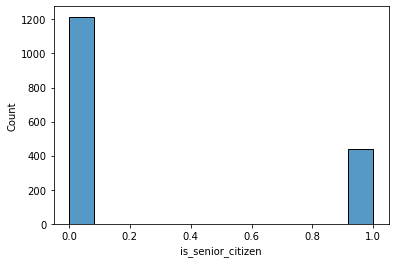

In [12]:
#Graph the difference
sns.histplot(customers_churned.is_senior_citizen)
plt.show()

In [13]:
customers_churned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1656 entries, 2 to 7045
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              1654 non-null   object 
 1   gender                   1656 non-null   object 
 2   is_senior_citizen        1656 non-null   bool   
 3   partner                  1656 non-null   object 
 4   dependents               1656 non-null   object 
 5   phone_service            1656 non-null   int64  
 6   internet_service         1656 non-null   int64  
 7   contract_type            1656 non-null   int64  
 8   payment_type             1656 non-null   object 
 9   monthly_charges          1656 non-null   float64
 10  total_charges            1656 non-null   float64
 11  churn                    1656 non-null   object 
 12  tenure                   1656 non-null   int64  
 13  tenure_rounded           1656 non-null   int64  
 14  is_female               

In [14]:
#What percentage of people that churned have phone service?
round(len(customers_churned[customers_churned.has_phone == True]) / len(customers_churned),2)

0.91

In [15]:
#91% had phone service
#What percentage of people that did not churn have phone service?
round(len(customers[(customers.has_phone == 1) & (customers.has_churned == False)]) / len(customers[customers.has_churned == False]),2)


0.9

In [16]:
#90% had phone service. Phone service in general does not appear to be a driver of churn
#What percentage of people that did not churn have internet service?
round(len(customers_churned[customers_churned.has_internet == True]) / len(customers_churned),2)

0.94

In [17]:
#94% had internet service.
#What percentage of people that did not churn have internet service?
customers_unchurned = customers[customers.has_churned == False]
round(len(customers_unchurned[customers_unchurned.has_internet == True]) / len(customers_unchurned),2)

0.81

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5

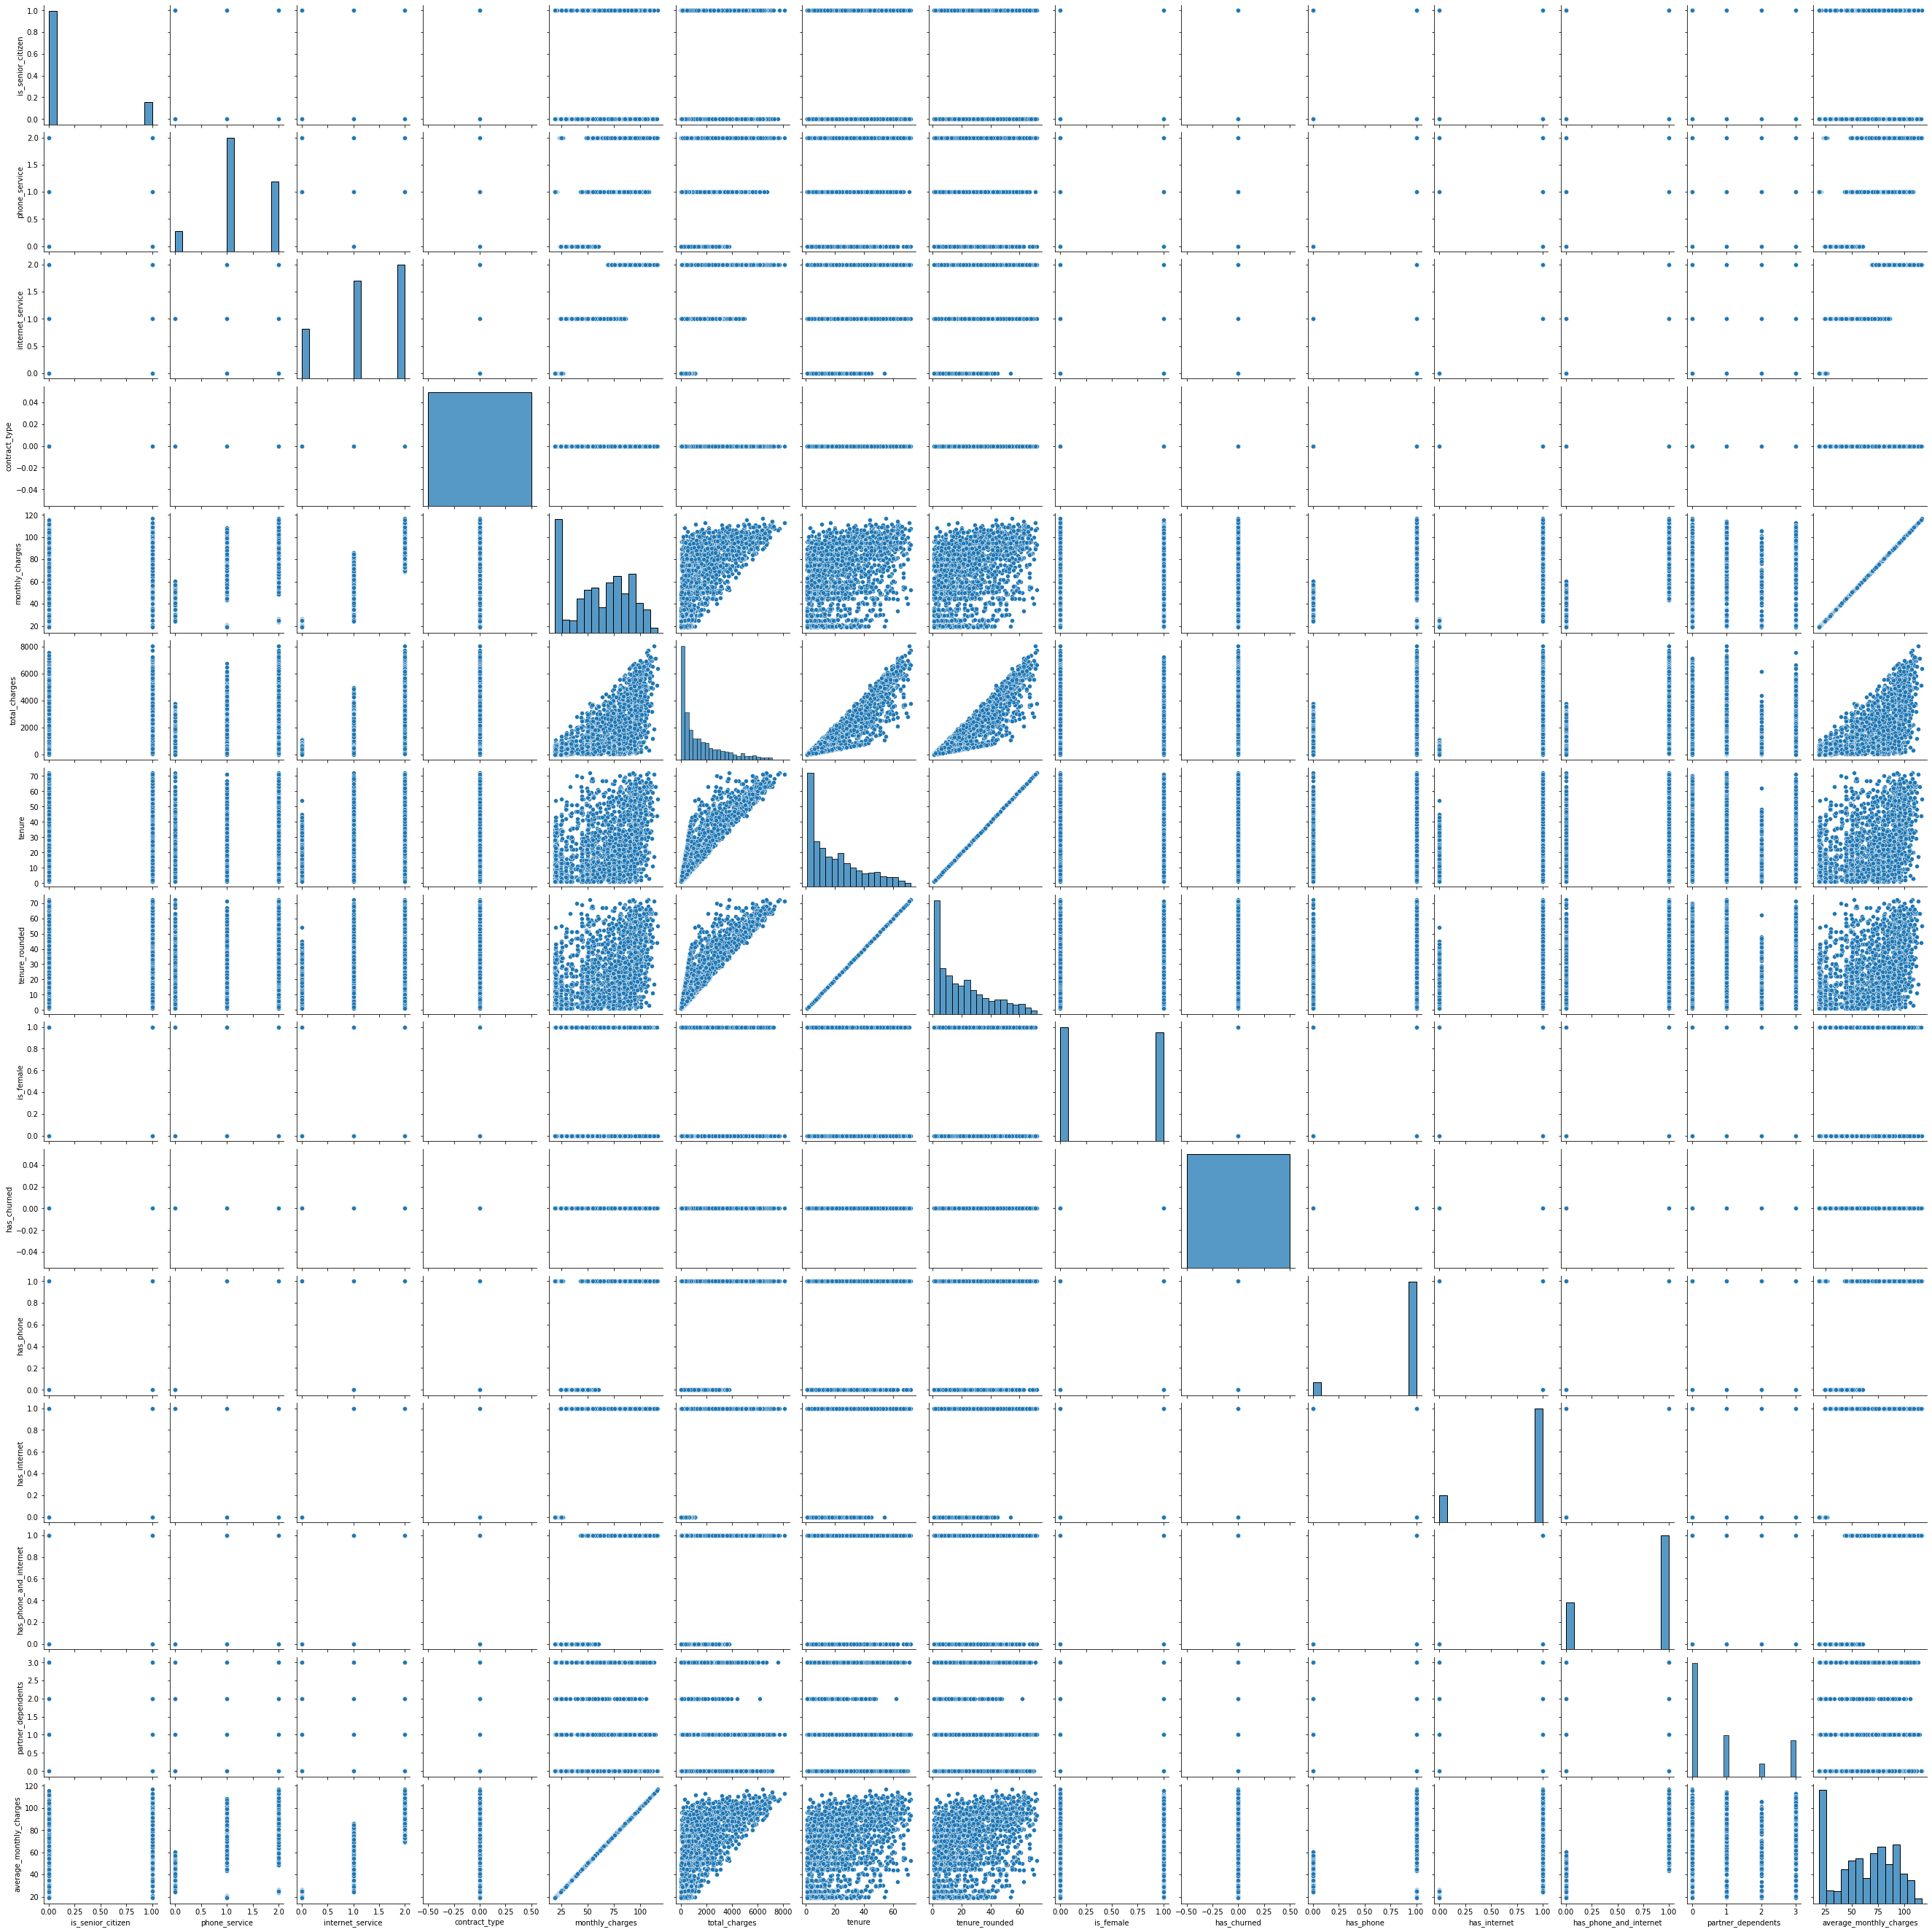

In [18]:
#Only 81% of unchurned customers had internet. This could be a driver, but let's keep looking
#try plotting everything and see what you see
sns.pairplot(customers_unchurned)
plt.show()

phone_service,0,1,2
has_churned,,,
False,0.100450,0.557207,0.342342
True,0.092995,0.471014,0.435990


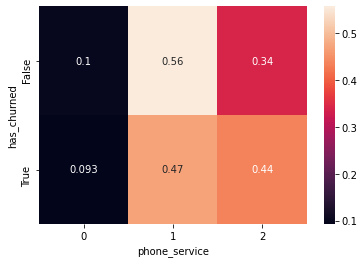

In [19]:
#Try a few heatmaps
data = pd.crosstab(customers.has_churned, customers.phone_service, normalize = 'index')
sns.heatmap(data, annot = True)
data

internet_service,0,1,2
has_churned,,,
False,0.191441,0.373423,0.435135
True,0.059783,0.238527,0.701691


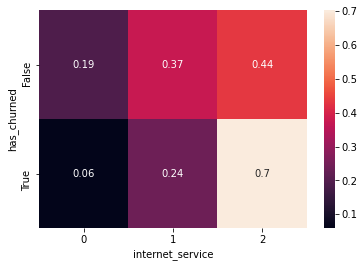

In [20]:
data = pd.crosstab(customers.has_churned, customers.internet_service, normalize = 'index')
sns.heatmap(data, annot=True)
data

gender,Female,Male
has_churned,,
False,1083,1137
True,843,813


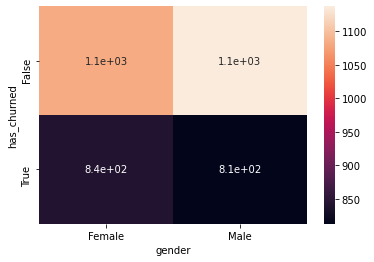

In [21]:
data = pd.crosstab(customers.has_churned, customers.gender)
sns.heatmap(data, annot = True)
data

partner,No,Yes
has_churned,,
False,1380,840
True,1115,541


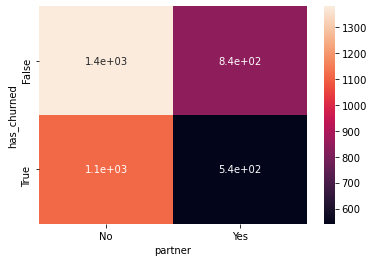

In [22]:
data = pd.crosstab(customers.has_churned, customers.partner)
sns.heatmap(data, annot = True)
data

dependents,No,Yes
has_churned,,
False,0.761261,0.238739
True,0.842995,0.157005


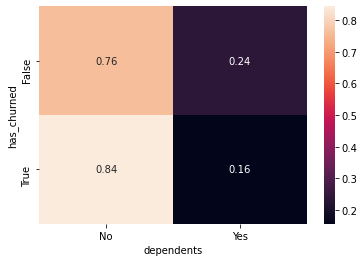

In [23]:
data = pd.crosstab(customers.has_churned, customers.dependents, normalize = 'index')
sns.heatmap(data, annot = True)
data

phone_service,0,1,2
internet_service,,,
0,0.000000,0.056763,0.003019
1,0.092995,0.114734,0.030797
2,0.000000,0.299517,0.402174


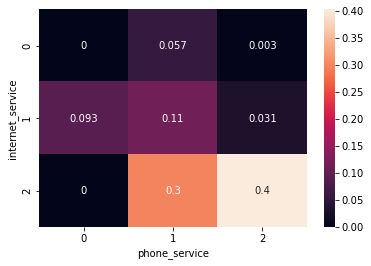

In [24]:
#The following is for churned customers
#Normalized to all instead of index
data = pd.crosstab(customers_churned.internet_service, customers_churned.phone_service, normalize = 'all')
sns.heatmap(data, annot = True)
data

phone_service,0,1,2
internet_service,,,
0,0.00000,0.172973,0.018468
1,0.10045,0.197297,0.075676
2,0.00000,0.186937,0.248198


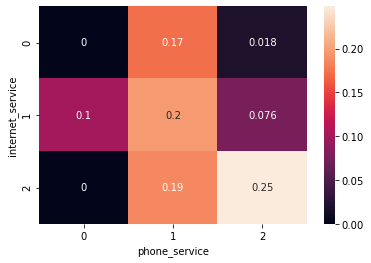

In [25]:
#The following is for unchurned customers
#Normalized to all instead of index
data = pd.crosstab(customers_unchurned.internet_service, customers_unchurned.phone_service, normalize = 'all')
sns.heatmap(data, annot = True)
data

payment_type,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
internet_service,,,,
0,0.007850,0.003623,0.007850,0.040459
1,0.024155,0.030193,0.115942,0.068237
2,0.089976,0.073671,0.476449,0.061594


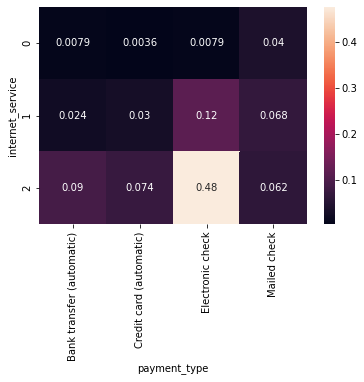

In [39]:
#For churned customers:
data = pd.crosstab(customers_churned.internet_service, customers_churned.payment_type, normalize = 'all')
sns.heatmap(data, annot = True)
data

payment_type,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
internet_service,,,,
0,0.023423,0.026577,0.025225,0.116216
1,0.071171,0.060811,0.127027,0.114414
2,0.080180,0.077027,0.233333,0.044595


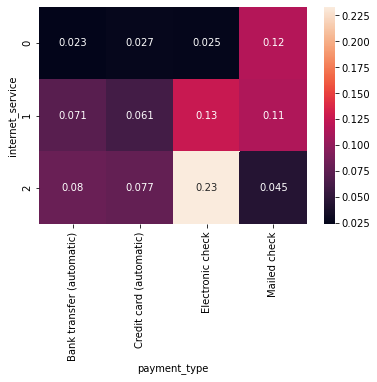

In [40]:
#For unchurned customers
data = pd.crosstab(customers_unchurned.internet_service, customers_unchurned.payment_type, normalize = 'all')
sns.heatmap(data, annot = True)
data

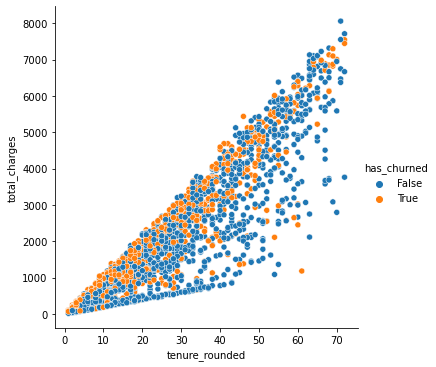

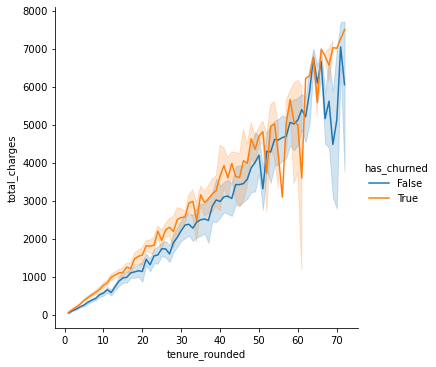

In [28]:
sns.relplot(x='tenure_rounded', y='total_charges', hue = 'has_churned', data = customers)
sns.relplot(kind = 'line', x='tenure_rounded', y='total_charges', hue='has_churned', data = customers)

plt.show()

In [29]:
#Looks like churned customers were paying more in total charges than unchurned

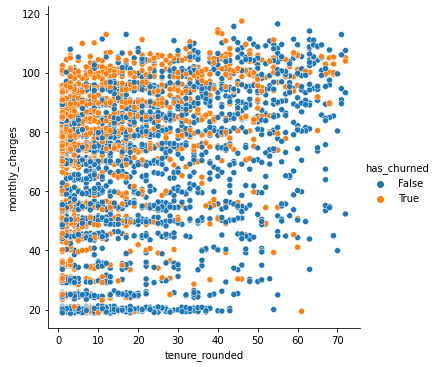

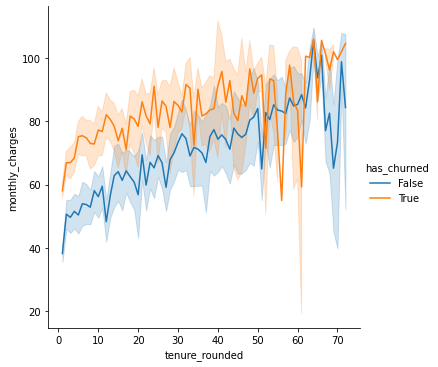

In [30]:
sns.relplot(x='tenure_rounded', y='monthly_charges', hue = 'has_churned', data = customers)
sns.relplot(kind = 'line', x='tenure_rounded', y='monthly_charges', hue='has_churned', data = customers)
plt.show()

In [31]:
#Looks like churned customers were paying more every month on average than unchurned
#This makes sense, since the majority of churned customers had more than one phone line and
#fiber optic internet

In [32]:
customers_churned.tenure.mean()

14.001811594202898

In [33]:
customers_unchurned.tenure.mean()

21.011711711711712

In [34]:
customers_churned.monthly_charges.mean()

72.9937198067633

In [35]:
customers_unchurned.monthly_charges.mean()

61.46263513513513

In [115]:
customers_churned[customers_churned.tenure_rounded <= 14].monthly_charges.mean()

67.40389908256881

In [116]:
customers_unchurned[customers_unchurned.tenure_rounded <= 21].monthly_charges.mean()

52.76386363636364

In [130]:
customers_churned[(customers_churned.tenure_rounded <= 14) & (customers_churned.internet_service == 2)].monthly_charges.mean()

83.07223021582733

In [132]:
customers_unchurned[(customers_unchurned.tenure_rounded <= 21) & (customers_unchurned.internet_service == 2)].monthly_charges.mean()

82.67058139534882

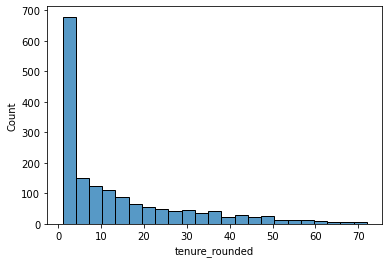

In [120]:
sns.histplot(customers_churned.tenure_rounded)
plt.show()

phone_service,0,1,2
internet_service,,,
0,0.00000,0.148825,0.002611
1,0.10705,0.187990,0.023499
2,0.00000,0.389034,0.140992


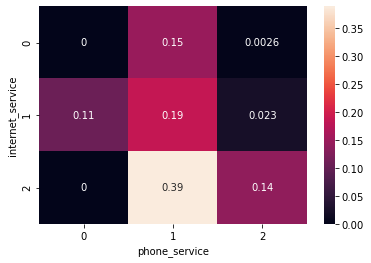

In [145]:
data = pd.crosstab(customers_churned[customers_churned.tenure_rounded <= 1].internet_service, customers_churned[customers_churned.tenure_rounded <= 1].phone_service, normalize='all')
sns.heatmap(data, annot=True)
data

In [134]:
single_month_churn = customers_churned[(customers_churned.tenure_rounded == 1) & (customers_churned.internet_service == 2) & (customers_churned.phone_service == 1)]
single_month_churn

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_internet,has_phone_and_internet,partner_dependents,start_date,average_monthly_charges,contract_type_desc,phone_type_desc,internet_type_desc,service_type,start_season
93,0151-ONTOV,Female,False,No,No,1,2,0,Mailed check,70.90,...,True,True,0,2021/6/27,70.90,Month-to-Month,One Line,Fiber Optic,Phone+Internet,summer
139,0231-LXVAP,Male,False,No,No,1,2,0,Electronic check,75.90,...,True,True,0,2021/6/27,75.90,Month-to-Month,One Line,Fiber Optic,Phone+Internet,summer
142,0235-KGSLC,Female,False,No,No,1,2,0,Credit card (automatic),85.55,...,True,True,0,2021/6/27,85.55,Month-to-Month,One Line,Fiber Optic,Phone+Internet,summer
201,0318-QUUOB,Male,False,Yes,No,1,2,0,Electronic check,80.55,...,True,True,1,2021/6/27,80.55,Month-to-Month,One Line,Fiber Optic,Phone+Internet,summer
213,0328-GRPMV,Female,False,No,No,1,2,0,Electronic check,70.10,...,True,True,0,2021/6/27,70.10,Month-to-Month,One Line,Fiber Optic,Phone+Internet,summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6909,9804-ICWBG,Male,False,No,No,1,2,0,Electronic check,69.90,...,True,True,0,2021/6/27,69.90,Month-to-Month,One Line,Fiber Optic,Phone+Internet,summer
6966,9885-CSMWE,Female,True,No,No,1,2,0,Electronic check,78.45,...,True,True,0,2021/6/27,78.45,Month-to-Month,One Line,Fiber Optic,Phone+Internet,summer
6971,9894-EZEWG,Female,False,No,No,1,2,0,Credit card (automatic),74.30,...,True,True,0,2021/6/27,74.30,Month-to-Month,One Line,Fiber Optic,Phone+Internet,summer
7007,9940-RHLFB,Female,False,No,No,1,2,0,Electronic check,75.30,...,True,True,0,2021/6/27,75.30,Month-to-Month,One Line,Fiber Optic,Phone+Internet,summer


dependents,No,Yes
partner,,
No,0.738255,0.073826
Yes,0.107383,0.080537


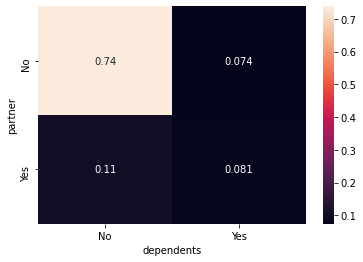

In [135]:
data = pd.crosstab(single_month_churn.partner, single_month_churn.dependents, normalize = 'all')
sns.heatmap(data, annot=True)
data

partner_dependents,0,1,2,3
gender,,,,
Female,0.442953,0.046980,0.040268,0.033557
Male,0.295302,0.060403,0.033557,0.046980


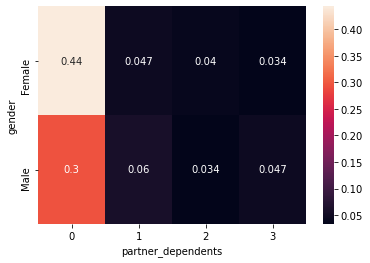

In [136]:
data = pd.crosstab(single_month_churn.gender, single_month_churn.partner_dependents, normalize = 'all')
sns.heatmap(data, annot=True)
data

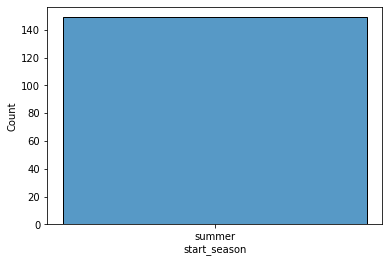

In [137]:
sns.histplot(single_month_churn['start_season'])
plt.show()

In [138]:
single_month_churn.start_season.value_counts()

summer    149
Name: start_season, dtype: int64

In [139]:
single_month_churn.start_date.value_counts()

2021/6/27    149
Name: start_date, dtype: int64

In [141]:
single_month_churn.payment_type.value_counts()

Electronic check             113
Mailed check                  27
Bank transfer (automatic)      6
Credit card (automatic)        3
Name: payment_type, dtype: int64

In [126]:
customers_churned.tenure_rounded.value_counts().head()

1    383
2    120
3     92
4     84
5     61
Name: tenure_rounded, dtype: int64

In [129]:
383 / len(customers_churned)

0.23128019323671498

In [36]:
customers_churned[customers_churned.tenure_rounded == 14].total_charges.mean()

1098.8500000000001

In [37]:
customers_unchurned[customers_unchurned.tenure_rounded == 14].total_charges.mean()

881.5202702702703

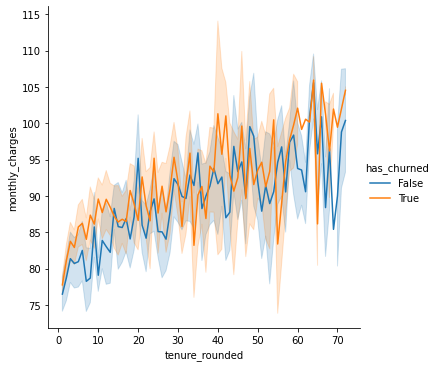

In [41]:
sns.relplot(kind = 'line', x='tenure_rounded', y='monthly_charges', hue='has_churned', data=customers[customers.internet_service == 2])
plt.show()

In [45]:
customers_churned[customers_churned.internet_service == 2].monthly_charges.mean()

86.47332185886403

In [46]:
customers_unchurned[customers_unchurned.internet_service == 2].monthly_charges.mean()

87.68022774327123

In [44]:
customers_churned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1656 entries, 2 to 7045
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              1654 non-null   object 
 1   gender                   1656 non-null   object 
 2   is_senior_citizen        1656 non-null   bool   
 3   partner                  1656 non-null   object 
 4   dependents               1656 non-null   object 
 5   phone_service            1656 non-null   int64  
 6   internet_service         1656 non-null   int64  
 7   contract_type            1656 non-null   int64  
 8   payment_type             1656 non-null   object 
 9   monthly_charges          1656 non-null   float64
 10  total_charges            1656 non-null   float64
 11  churn                    1656 non-null   object 
 12  tenure                   1656 non-null   int64  
 13  tenure_rounded           1656 non-null   int64  
 14  is_female               

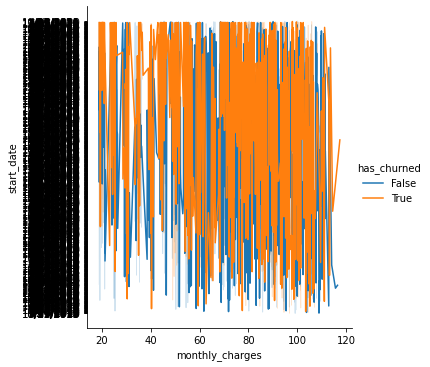

In [48]:
sns.relplot(kind='line',x='monthly_charges',y='start_date',hue='has_churned',data=customers)
plt.show()

In [49]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3876 entries, 1 to 7046
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              3873 non-null   object 
 1   gender                   3876 non-null   object 
 2   is_senior_citizen        3876 non-null   bool   
 3   partner                  3876 non-null   object 
 4   dependents               3876 non-null   object 
 5   phone_service            3876 non-null   int64  
 6   internet_service         3876 non-null   int64  
 7   contract_type            3876 non-null   int64  
 8   payment_type             3876 non-null   object 
 9   monthly_charges          3876 non-null   float64
 10  total_charges            3876 non-null   float64
 11  churn                    3876 non-null   object 
 12  tenure                   3876 non-null   int64  
 13  tenure_rounded           3876 non-null   int64  
 14  is_female               

partner,No,Yes
internet_service,,
0,0.045894,0.013889
1,0.178140,0.060386
2,0.449275,0.252415


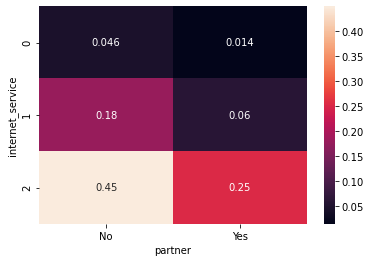

In [52]:
#Let's look at some more heat maps
data = pd.crosstab(customers_churned.internet_service, customers_churned.partner,normalize='all')
sns.heatmap(data, annot=True)
data

partner,No,Yes
internet_service,,
0,0.139640,0.051802
1,0.236937,0.136486
2,0.245045,0.190090


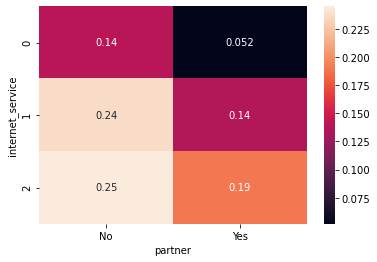

In [53]:
data = pd.crosstab(customers_unchurned.internet_service, customers_unchurned.partner,normalize='all')
sns.heatmap(data, annot=True)
data

dependents,No,Yes
internet_service,,
0,0.046498,0.013285
1,0.194444,0.044082
2,0.602053,0.099638


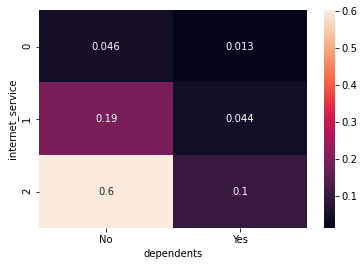

In [54]:
data = pd.crosstab(customers_churned.internet_service, customers_churned.dependents,normalize='all')
sns.heatmap(data, annot=True)
data

dependents,No,Yes
internet_service,,
0,0.134234,0.057207
1,0.273874,0.099550
2,0.353153,0.081982


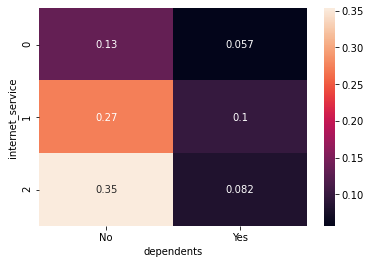

In [55]:
data = pd.crosstab(customers_unchurned.internet_service, customers_unchurned.dependents,normalize='all')
sns.heatmap(data, annot=True)
data

dependents,No,Yes
partner,,
No,0.608434,0.031842
Yes,0.249570,0.110155


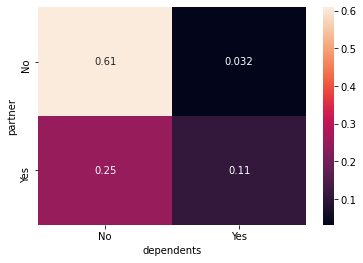

In [57]:
data = pd.crosstab(customers_churned[customers_churned.internet_service==2].partner, customers_churned[customers_churned.internet_service==2].dependents,normalize='all')
sns.heatmap(data, annot=True)
data

dependents,No,Yes
partner,,
No,0.533126,0.030021
Yes,0.278468,0.158385


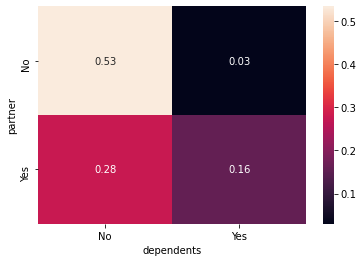

In [58]:
data = pd.crosstab(customers_unchurned[customers_unchurned.internet_service==2].partner, customers_unchurned[customers_unchurned.internet_service==2].dependents,normalize='all')
sns.heatmap(data, annot=True)
data

phone_service,1,2
is_senior_citizen,,
False,0.324441,0.358864
True,0.102410,0.214286


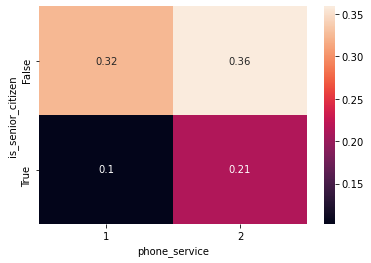

In [59]:
data = pd.crosstab(customers_churned[customers_churned.internet_service==2].is_senior_citizen, customers_churned[customers_churned.internet_service==2].phone_service,normalize='all')
sns.heatmap(data, annot=True)
data

phone_service,1,2
is_senior_citizen,,
False,0.327122,0.395445
True,0.102484,0.174948


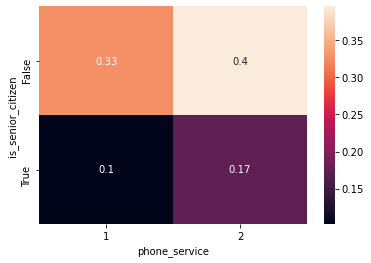

In [60]:
data = pd.crosstab(customers_unchurned[customers_unchurned.internet_service==2].is_senior_citizen, customers_unchurned[customers_unchurned.internet_service==2].phone_service,normalize='all')
sns.heatmap(data, annot=True)
data

partner,No,Yes
is_senior_citizen,,
False,0.454389,0.228916
True,0.185886,0.130809


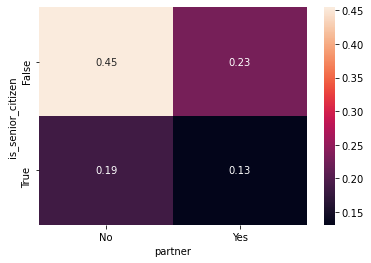

In [61]:
data = pd.crosstab(customers_churned[customers_churned.internet_service==2].is_senior_citizen, customers_churned[customers_churned.internet_service==2].partner,normalize='all')
sns.heatmap(data, annot=True)
data

partner,No,Yes
is_senior_citizen,,
False,0.424431,0.298137
True,0.138716,0.138716


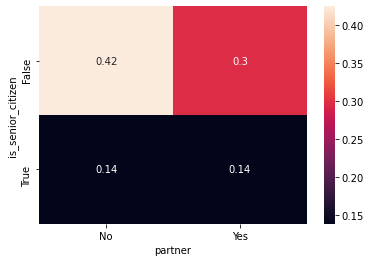

In [62]:
data = pd.crosstab(customers_unchurned[customers_unchurned.internet_service==2].is_senior_citizen, customers_unchurned[customers_unchurned.internet_service==2].partner,normalize='all')
sns.heatmap(data, annot=True)
data

dependents,No,Yes
is_senior_citizen,,
False,0.553356,0.129948
True,0.304647,0.012048


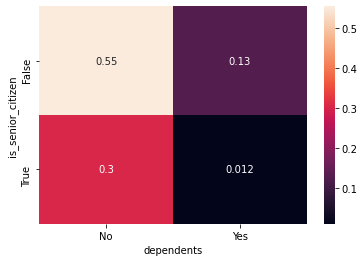

In [63]:
data = pd.crosstab(customers_churned[customers_churned.internet_service==2].is_senior_citizen, customers_churned[customers_churned.internet_service==2].dependents,normalize='all')
sns.heatmap(data, annot=True)
data

dependents,No,Yes
is_senior_citizen,,
False,0.559006,0.163561
True,0.252588,0.024845


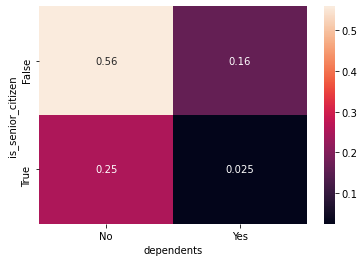

In [64]:
data = pd.crosstab(customers_unchurned[customers_unchurned.internet_service==2].is_senior_citizen, customers_unchurned[customers_unchurned.internet_service==2].dependents,normalize='all')
sns.heatmap(data, annot=True)
data

gender,Female,Male
is_senior_citizen,,
False,0.357143,0.326162
True,0.158348,0.158348


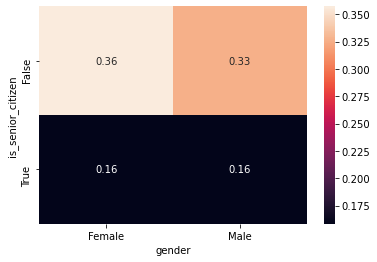

In [65]:
data = pd.crosstab(customers_churned[customers_churned.internet_service==2].is_senior_citizen, customers_churned[customers_churned.internet_service==2].gender,normalize='all')
sns.heatmap(data, annot=True)
data

gender,Female,Male
is_senior_citizen,,
False,0.348861,0.373706
True,0.135611,0.141822


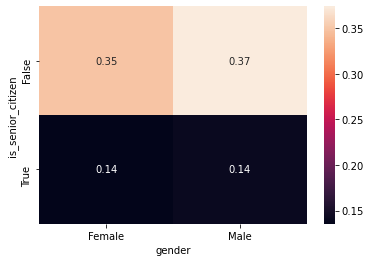

In [66]:
data = pd.crosstab(customers_unchurned[customers_unchurned.internet_service==2].is_senior_citizen, customers_unchurned[customers_unchurned.internet_service==2].gender,normalize='all')
sns.heatmap(data, annot=True)
data

partner_dependents,0,1,2,3
gender,,,,
Female,0.337349,0.105852,0.013769,0.058520
Male,0.271084,0.143718,0.018072,0.051635


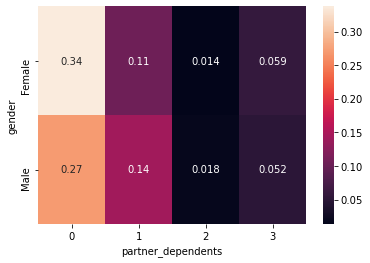

In [67]:
data = pd.crosstab(customers_churned[customers_churned.internet_service==2].gender, customers_churned[customers_churned.internet_service==2].partner_dependents,normalize='all')
sns.heatmap(data, annot=True)
data

partner_dependents,0,1,2,3
gender,,,,
Female,0.254658,0.132505,0.017598,0.079710
Male,0.278468,0.145963,0.012422,0.078675


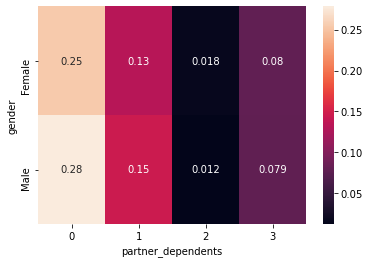

In [68]:
data = pd.crosstab(customers_unchurned[customers_unchurned.internet_service==2].gender, customers_unchurned[customers_unchurned.internet_service==2].partner_dependents,normalize='all')
sns.heatmap(data, annot=True)
data

In [72]:
#Could not find any valuable info from the heat maps. 
#Try binning the start_dates and see if there is a trend
#Will need to convert the start date to a usable format
def fix_date(string):
    x = string.split('/')
    year = x[2]
    month = x[0]
    day = x[1]
    
    return year + '/' + month + '/' + day

customers_churned.start_date = customers_churned.start_date.apply(fix_date)
customers_churned.start_date.sort_values()

/Users/johnathonsmith/opt/miniconda3/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


6418    2015/10/19
3175    2015/10/29
1090    2015/11/11
4839    2015/11/16
209     2015/11/17
           ...    
3093      2021/6/6
5600      2021/6/6
1549      2021/6/7
2946      2021/6/8
603       2021/6/8
Name: start_date, Length: 1656, dtype: object

In [73]:
customers_unchurned.start_date = customers_unchurned.start_date.apply(fix_date)
customers_unchurned.start_date.sort_values()

4935    2015/10/12
1839     2015/10/6
4069    2015/11/17
2717    2015/11/24
5555    2015/11/29
           ...    
6829      2021/6/8
2528      2021/6/9
1208      2021/6/9
2703      2021/6/9
2437      2021/6/9
Name: start_date, Length: 2220, dtype: object

In [86]:
#get the seasons of when they started
def get_season(string):
    x = string.split('/')
    month = x[1]
    if month == '12' or month == '1' or month == '2':
        return 'winter'
    elif month == '3' or month == '4' or month == '5':
        return 'spring'
    elif month == '6' or month == '7' or month == '8':
        return 'summer'
    else:
        return 'fall'

customers_churned['start_season'] = customers_churned.start_date.apply(get_season)
customers_churned

/Users/johnathonsmith/opt/miniconda3/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_internet,has_phone_and_internet,partner_dependents,start_date,average_monthly_charges,contract_type_desc,phone_type_desc,internet_type_desc,service_type,start_season
2,0004-TLHLJ,Male,False,No,No,1,2,0,Electronic check,73.90,...,True,True,0,2021/4/3,73.90,Month-to-Month,One Line,Fiber Optic,Phone+Internet,spring
3,0011-IGKFF,Male,True,Yes,No,1,2,0,Electronic check,98.00,...,True,True,1,2020/7/8,98.00,Month-to-Month,One Line,Fiber Optic,Phone+Internet,summer
4,0013-EXCHZ,Female,True,Yes,No,1,2,0,Mailed check,83.90,...,True,True,1,2021/4/22,83.90,Month-to-Month,One Line,Fiber Optic,Phone+Internet,spring
19,0023-HGHWL,Male,True,No,No,0,1,0,Electronic check,25.10,...,True,False,0,2021/6/27,25.10,Month-to-Month,No Phone Service,DSL,Internet Only,summer
21,0023-XUOPT,Female,False,Yes,No,2,2,0,Electronic check,94.10,...,True,True,1,2020/6/30,94.10,Month-to-Month,Two or More Lines,Fiber Optic,Phone+Internet,summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,9965-YOKZB,Male,True,No,No,2,2,0,Electronic check,83.85,...,True,True,0,2020/10/14,83.85,Month-to-Month,Two or More Lines,Fiber Optic,Phone+Internet,fall
7031,9974-JFBHQ,Female,False,Yes,Yes,0,1,0,Bank transfer (automatic),30.50,...,True,False,3,2021/6/27,30.50,Month-to-Month,No Phone Service,DSL,Internet Only,summer
7042,9995-HOTOH,Female,False,No,No,1,2,0,Mailed check,70.15,...,True,True,0,2021/6/27,70.15,Month-to-Month,One Line,Fiber Optic,Phone+Internet,summer
7043,NaN,Female,False,No,No,1,0,0,Bank transfer (automatic),20.95,...,False,False,0,2021/3/25,20.95,Month-to-Month,One Line,No Internet Service,Phone Only,spring


In [78]:
customers_unchurned['start_season'] = customers_unchurned.start_date.apply(get_season)
customers_unchurned

/Users/johnathonsmith/opt/miniconda3/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_internet,has_phone_and_internet,partner_dependents,start_date,average_monthly_charges,contract_type_desc,phone_type_desc,internet_type_desc,service_type,start_season
1,0003-MKNFE,Male,False,No,No,2,1,0,Mailed check,59.90,...,True,True,0,2020/10/25,59.90,Month-to-Month,Two or More Lines,DSL,Phone+Internet,fall
5,0013-MHZWF,Female,False,No,Yes,1,1,0,Credit card (automatic),69.40,...,True,True,2,2020/11/19,69.40,Month-to-Month,One Line,DSL,Phone+Internet,fall
8,0015-UOCOJ,Female,True,No,No,1,1,0,Electronic check,48.20,...,True,True,0,2020/12/25,48.20,Month-to-Month,One Line,DSL,Phone+Internet,winter
12,0018-NYROU,Female,False,Yes,No,1,2,0,Electronic check,68.95,...,True,True,1,2021/2/22,68.95,Month-to-Month,One Line,Fiber Optic,Phone+Internet,winter
17,0021-IKXGC,Female,True,No,No,2,2,0,Electronic check,72.10,...,True,True,0,2021/6/27,72.10,Month-to-Month,Two or More Lines,Fiber Optic,Phone+Internet,summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,9971-ZWPBF,Male,True,Yes,Yes,2,2,0,Electronic check,108.90,...,True,True,3,2018/10/19,108.90,Month-to-Month,Two or More Lines,Fiber Optic,Phone+Internet,fall
7029,9972-NKTFD,Female,False,No,No,1,1,0,Bank transfer (automatic),54.65,...,True,True,0,2019/4/5,54.65,Month-to-Month,One Line,DSL,Phone+Internet,spring
7037,9986-BONCE,Male,False,No,Yes,1,2,0,Credit card (automatic),99.15,...,True,True,2,2016/5/21,99.15,Month-to-Month,One Line,Fiber Optic,Phone+Internet,spring
7039,9992-RRAMN,Male,False,No,No,1,0,0,Mailed check,18.90,...,False,False,0,2021/6/27,18.90,Month-to-Month,One Line,No Internet Service,Phone Only,summer


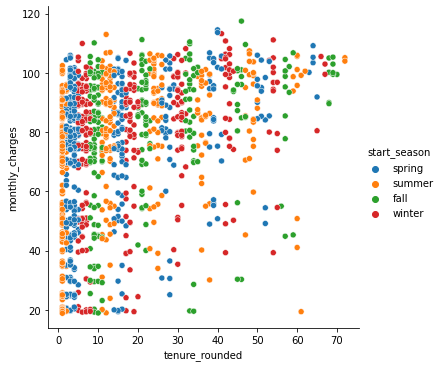

In [81]:
sns.relplot(x='tenure_rounded', y='monthly_charges', hue='start_season', data = customers_churned)
plt.show()

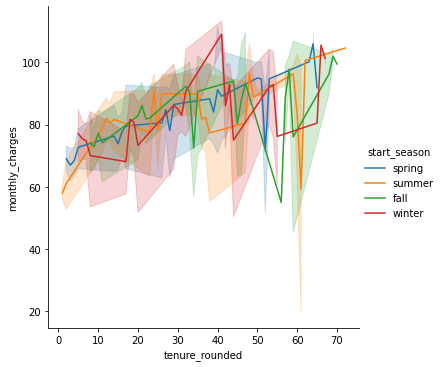

In [82]:
sns.relplot(kind = 'line', x='tenure_rounded', y='monthly_charges', hue='start_season', data = customers_churned)
plt.show()

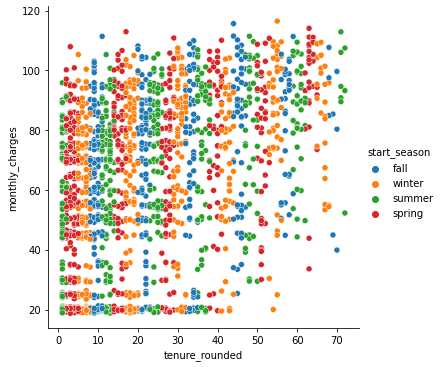

In [83]:
sns.relplot(x='tenure_rounded', y='monthly_charges', hue='start_season', data = customers_unchurned)
plt.show()

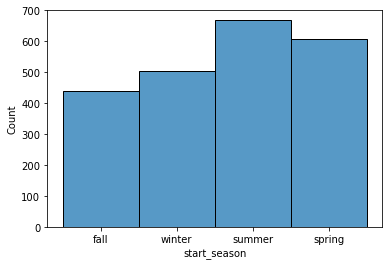

In [85]:
sns.histplot(customers_unchurned.start_season)
plt.show()

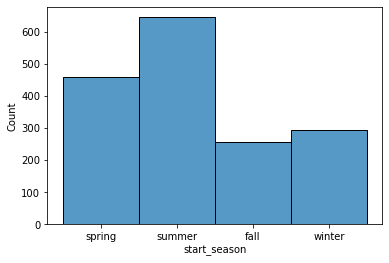

In [88]:
sns.histplot(customers_churned['start_season'])
plt.show()

In [89]:
customers_churned.describe()

,phone_service,internet_service,contract_type,monthly_charges,total_charges,tenure,tenure_rounded,partner_dependents,average_monthly_charges
count,1656.000000,1656.000000,1656.0,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000,1656.000000
mean,1.342995,1.641908,0.0,72.993720,1163.775815,14.001812,14.001812,0.640700,72.993720
std,0.641552,0.591302,0.0,24.099529,1481.461332,15.866417,15.866417,1.004286,24.099529
min,0.000000,0.000000,0.0,18.850000,18.850000,1.000000,1.000000,0.000000,18.850000
25%,1.000000,1.000000,0.0,55.187500,93.962500,2.000000,2.000000,0.000000,55.187500
50%,1.000000,2.000000,0.0,79.025000,513.225000,7.000000,7.000000,0.000000,79.025000
75%,2.000000,2.000000,0.0,90.862500,1644.475000,21.000000,21.000000,1.000000,90.862500
max,2.000000,2.000000,0.0,117.450000,7548.100000,72.000000,72.000000,3.000000,117.450000


In [90]:
customers_unchurned.describe()

,phone_service,internet_service,contract_type,monthly_charges,total_charges,tenure,tenure_rounded,partner_dependents,average_monthly_charges
count,2220.000000,2220.000000,2220.0,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000
mean,1.241892,1.243694,0.0,61.462635,1521.927590,21.011712,21.011712,0.855856,61.462635
std,0.620044,0.753290,0.0,27.863547,1690.054484,18.400184,18.400184,1.142776,27.863547
min,0.000000,0.000000,0.0,18.750000,18.850000,1.000000,1.000000,0.000000,18.750000
25%,1.000000,1.000000,0.0,38.537500,223.362500,5.000000,5.000000,0.000000,38.537500
50%,1.000000,1.000000,0.0,64.950000,830.525000,16.000000,16.000000,0.000000,64.950000
75%,2.000000,2.000000,0.0,84.912500,2251.662500,33.000000,33.000000,1.000000,84.912500
max,2.000000,2.000000,0.0,116.500000,8061.500000,72.000000,72.000000,3.000000,116.500000


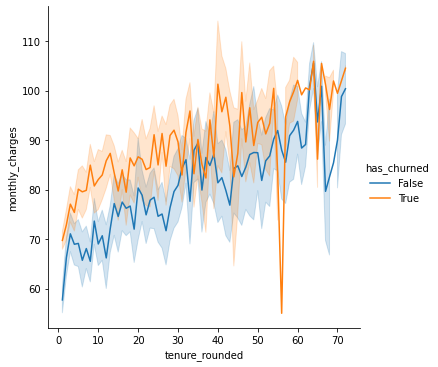

In [93]:
sns.relplot(kind='line', x='tenure_rounded',y='monthly_charges',hue='has_churned',data=customers[customers.service_type == 'Phone+Internet'])
plt.show()

In [95]:
customers_churned[customers_churned.service_type == 'Phone+Internet'].monthly_charges.mean()

80.7351389878831

In [96]:
customers_unchurned[customers_unchurned.service_type == 'Phone+Internet'].monthly_charges.mean()

76.0073155216285